<a href="https://colab.research.google.com/github/agarciam980902/agarciam980902/blob/main/Capstone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Build a Sentiment Index to Track Sentiment on Tax Cooperation









For this Sentiment Index Analysis we will be focusing on concepts that track the sentiment of tax cooperation and taxation in general. We will be separating the terms in three overall themes:

**1. Taxation**:
*   ***ECONOMIC TAXATION***
*   ***ECONOMIC DEBT***
*   ***ECONOMIC BUDGET DEFICIT***

**2. International Governance**:
*   ***INTERGOVERNMENTAL COOPERATION***
*   ***BROADER INTERNATIONAL COOPERATION***
*   ***INTERNATIONAL JUDICIAL COPERATION***

**3. Disputes**:
*   ***ECONOMIC TRADE DISPUTE***
*   ***SANCTIONS***
*   ***NEGOTIATIONS***

In [4]:
#Installation of all necessary libraries and add-ons
!pip install GdeltDoc
import pandas as pd
import plotly.express as px
#import gif
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
from gdeltdoc import GdeltDoc, Filters, near
from sklearn.preprocessing import StandardScaler
!pip install plotly
!pip install google-cloud-bigquery


Here we start importing the data vailable in GDELT API in Python.

First we explain how we connect to GDELT. We select *api* because its the free version for using this data set. It has a "shorter" access in terms of timeset which limits us up to 2017.

If we wanted to do a greater analysis into the past we could use the *bigqueary* but we would probably need to pay after a certain use of data.

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
import pandas as pd

file_path = '/content/drive/MyDrive/CAPSTONE/INTERNATIONAL_COOPERATION_THEMES.xlsx'
df = pd.read_excel(file_path)

# Preview the data
df.head()

,date,tone
0,2020-01-07,0.016033
1,2020-01-08,0.330872
2,2020-01-09,0.143484
3,2020-01-10,0.010262
4,2020-01-11,0.160277


In [7]:
import os

folder_path = '/content/drive/MyDrive/CAPSTONE/'

# Create a dictionary to store all DataFrames
dataframes = {}

for filename in os.listdir(folder_path):
    if filename.endswith('.xlsx'):
        path = os.path.join(folder_path, filename)
        df_name = filename.replace('.xlsx', '')
        dataframes[df_name] = pd.read_excel(path)

# Optional: check what's loaded
for name, df in dataframes.items():
    print(f"{name}: {df.shape}")
    display(df.head())

ECONOMIC_TAXATION_THEMES: (1970, 2)


,date,tone
0,2020-01-08,0.074507
1,2020-01-09,-0.020740
2,2020-01-10,0.097153
3,2020-01-11,0.228454
4,2020-01-12,-0.035123


INTERNATIONAL_COOPERATION_THEMES: (1971, 2)


,date,tone
0,2020-01-07,0.016033
1,2020-01-08,0.330872
2,2020-01-09,0.143484
3,2020-01-10,0.010262
4,2020-01-11,0.160277


DISPUTE: (1971, 2)


,date,tone
0,2020-01-07,0.835131
1,2020-01-08,0.211908
2,2020-01-09,0.362020
3,2020-01-10,0.347768
4,2020-01-11,0.389751


**ECONOMIC TAXATION**

ECONOMIC_TAXATION

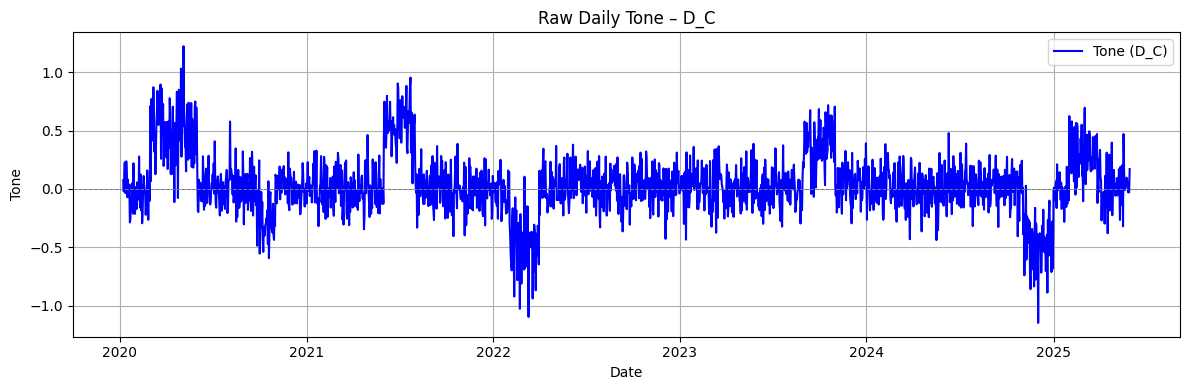

In [8]:
# Load a specific sheet, e.g. 'D_C'
df_ETT_ET = pd.read_excel('/content/drive/MyDrive/CAPSTONE/ECONOMIC_TAXATION_THEMES.xlsx', sheet_name='Economic_Taxation')

# Make sure 'date' is datetime (if it's a column)
df_ETT_ET['date'] = pd.to_datetime(df_ETT_ET['date'])

# Plot the tone
plt.figure(figsize=(12, 4))
plt.plot(df_ETT_ET['date'], df_ETT_ET['tone'], label='Tone (D_C)', color='blue')
plt.axhline(0, linestyle='--', color='gray', linewidth=0.7)
plt.xlabel("Date")
plt.ylabel("Tone")
plt.title("Raw Daily Tone – D_C")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [9]:
df_ETT_ET['ma28'] = df_ETT_ET['tone'].rolling(window=28).mean()

In [10]:
df_ETT_ET.head()

,date,tone,ma28
0,2020-01-08,0.074507,NaN
1,2020-01-09,-0.020740,NaN
2,2020-01-10,0.097153,NaN
3,2020-01-11,0.228454,NaN
4,2020-01-12,-0.035123,NaN


<Axes: xlabel='date'>

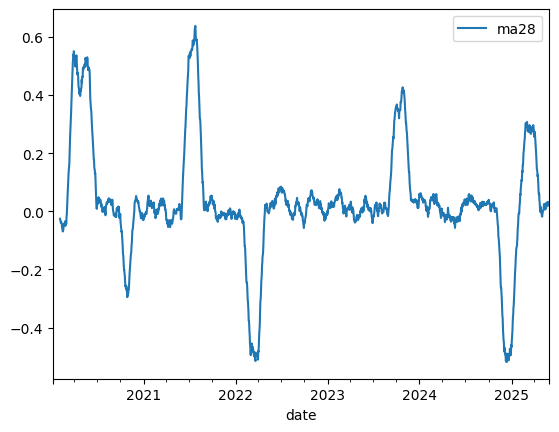

In [11]:
df_ETT_ET.plot(x="date", y="ma28")

ECONOMIC_DEBT

<Axes: xlabel='date'>

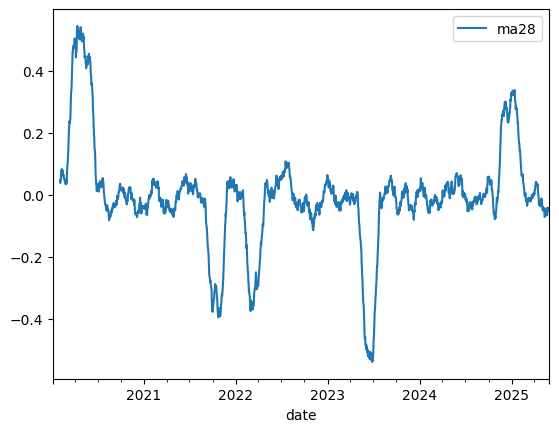

In [12]:
# Load a specific sheet, e.g. 'D_C'
df_ETT_ED = pd.read_excel('/content/drive/MyDrive/CAPSTONE/ECONOMIC_TAXATION_THEMES.xlsx', sheet_name='Economic_Debt')

# Make sure 'date' is datetime (if it's a column)
df_ETT_ED['date'] = pd.to_datetime(df_ETT_ED['date'])

#Rolling Average
df_ETT_ED['ma28'] = df_ETT_ED['tone'].rolling(window=28).mean()

#Graph
df_ETT_ED.plot(x="date", y="ma28")

Economic_Budget_Deficit

<Axes: xlabel='date'>

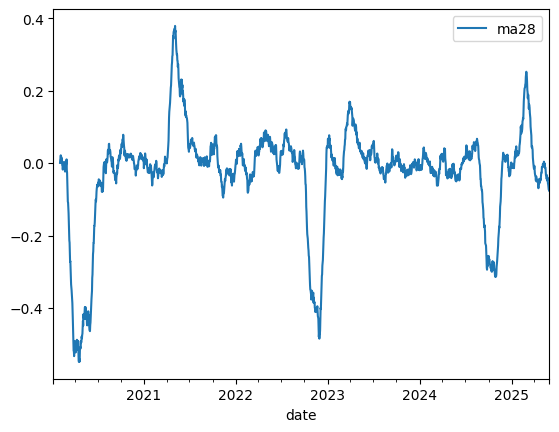

In [13]:
# Load a specific sheet, e.g. 'D_C'
df_ETT_EBD = pd.read_excel('/content/drive/MyDrive/CAPSTONE/ECONOMIC_TAXATION_THEMES.xlsx', sheet_name='Economic_Budget_Deficit')

# Make sure 'date' is datetime (if it's a column)
df_ETT_EBD['date'] = pd.to_datetime(df_ETT_EBD['date'])

#Rolling Average
df_ETT_EBD['ma28'] = df_ETT_EBD['tone'].rolling(window=28).mean()

#Graph
df_ETT_EBD.plot(x="date", y="ma28")

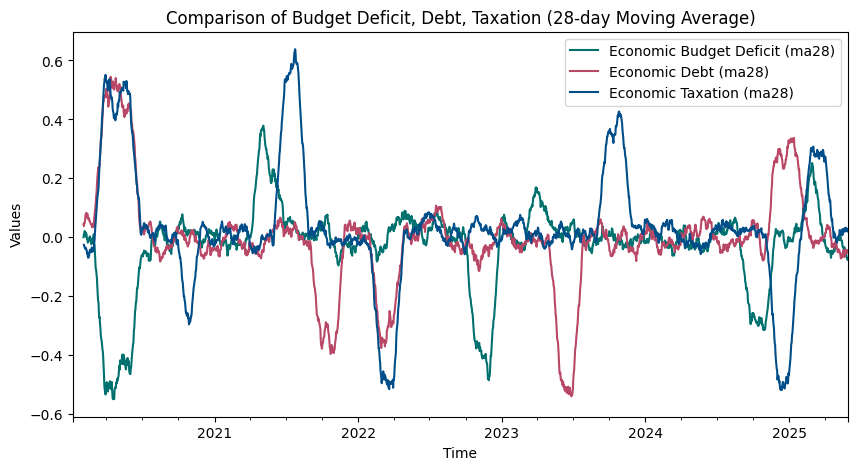

In [41]:
plt.figure(figsize=(10, 5))

df_ETT_EBD.plot(x="date", y="ma28", label="Economic Budget Deficit (ma28)", color="#00716F", ax=plt.gca())
df_ETT_ED.plot(x="date", y="ma28", label="Economic Debt (ma28)", color="#B94766", ax=plt.gca())
df_ETT_ET.plot(x="date", y="ma28", label="Economic Taxation (ma28)", color="#004E89", ax=plt.gca())

plt.title("Comparison of Budget Deficit, Debt, Taxation (28-day Moving Average)")
plt.xlabel("Time")
plt.ylabel("Values")
plt.legend()
plt.show()

**INTERNATIONAL COOPERATION**

Diplomatic Cooperation (D_C)

<Axes: xlabel='date'>

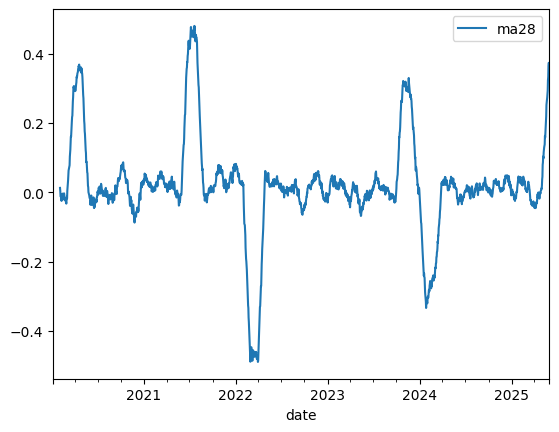

In [15]:
# Load a specific sheet, e.g. 'D_C'
df_ICT_DC = pd.read_excel('/content/drive/MyDrive/CAPSTONE/INTERNATIONAL_COOPERATION_THEMES.xlsx', sheet_name='D_C')

# Make sure 'date' is datetime (if it's a column)
df_ICT_DC['date'] = pd.to_datetime(df_ICT_DC['date'])

#Rolling Average
df_ICT_DC['ma28'] = df_ICT_DC['tone'].rolling(window=28).mean()

#Graph
df_ICT_DC.plot(x="date", y="ma28")

International Governmental Governance (I_G_G)

<Axes: xlabel='date'>

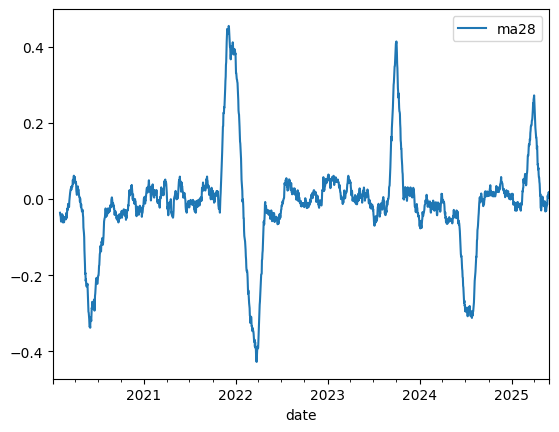

In [16]:
# Load a specific sheet, e.g. 'D_C'
df_ICT_IGG = pd.read_excel('/content/drive/MyDrive/CAPSTONE/INTERNATIONAL_COOPERATION_THEMES.xlsx', sheet_name='I_G_G')

# Make sure 'date' is datetime (if it's a column)
df_ICT_IGG['date'] = pd.to_datetime(df_ICT_IGG['date'])

#Rolling Average
df_ICT_IGG['ma28'] = df_ICT_IGG['tone'].rolling(window=28).mean()

#Graph
df_ICT_IGG.plot(x="date", y="ma28")

International Judicial Cooperation (I_J_C)

<Axes: xlabel='date'>

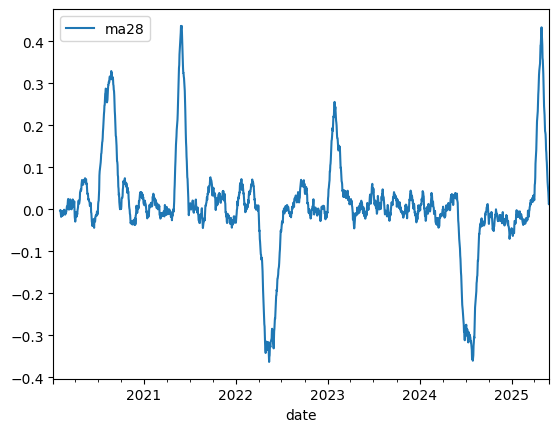

In [17]:
# Load a specific sheet, e.g. 'D_C'
df_ICT_IJC = pd.read_excel('/content/drive/MyDrive/CAPSTONE/INTERNATIONAL_COOPERATION_THEMES.xlsx', sheet_name='I_J_C')

# Make sure 'date' is datetime (if it's a column)
df_ICT_IJC['date'] = pd.to_datetime(df_ICT_IJC['date'])

#Rolling Average
df_ICT_IJC['ma28'] = df_ICT_IJC['tone'].rolling(window=28).mean()

#Graph
df_ICT_IJC.plot(x="date", y="ma28")

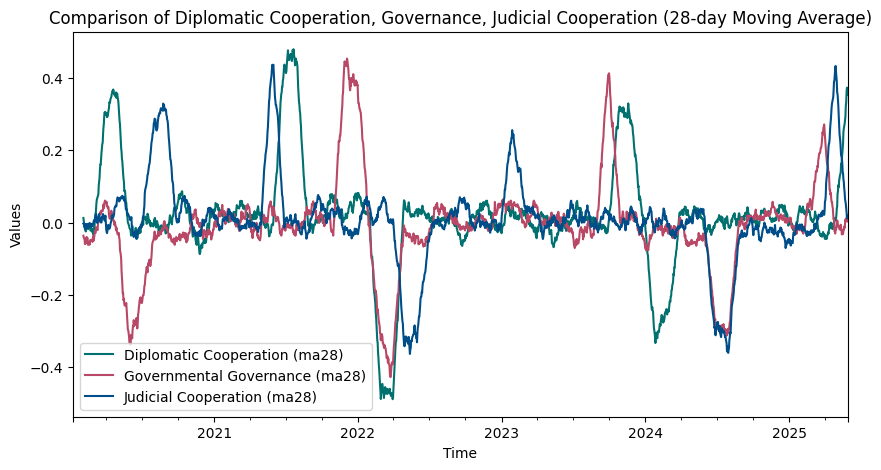

In [42]:
plt.figure(figsize=(10, 5))

df_ICT_DC.plot(x="date", y="ma28", label="Diplomatic Cooperation (ma28)", color="#00716F", ax=plt.gca())
df_ICT_IGG.plot(x="date", y="ma28", label="Governmental Governance (ma28)", color="#B94766", ax=plt.gca())
df_ICT_IJC.plot(x="date", y="ma28", label="Judicial Cooperation (ma28)", color="#004E89", ax=plt.gca())

plt.title("Comparison of Diplomatic Cooperation, Governance, Judicial Cooperation (28-day Moving Average)")
plt.xlabel("Time")
plt.ylabel("Values")
plt.legend()
plt.show()

**DISPUTE, CONFLICT, FRICTION**

Trade Dispute

<Axes: xlabel='date'>

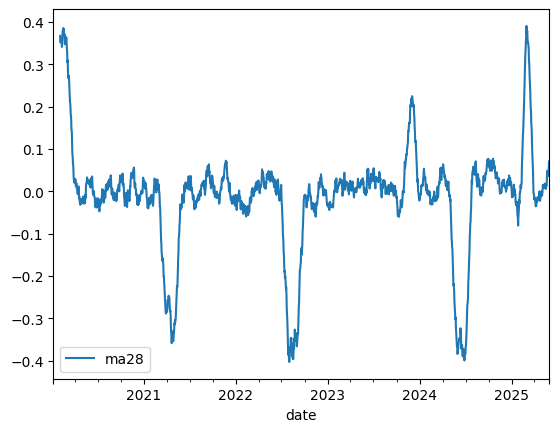

In [19]:
# Load a specific sheet, e.g. 'D_C'
df_D_TD = pd.read_excel('/content/drive/MyDrive/CAPSTONE/DISPUTE.xlsx', sheet_name='Trade_Dispute')

# Make sure 'date' is datetime (if it's a column)
df_D_TD['date'] = pd.to_datetime(df_D_TD['date'])

#Rolling Average
df_D_TD['ma28'] = df_D_TD['tone'].rolling(window=28).mean()

#Graph
df_D_TD.plot(x="date", y="ma28")

Negotiations

<Axes: xlabel='date'>

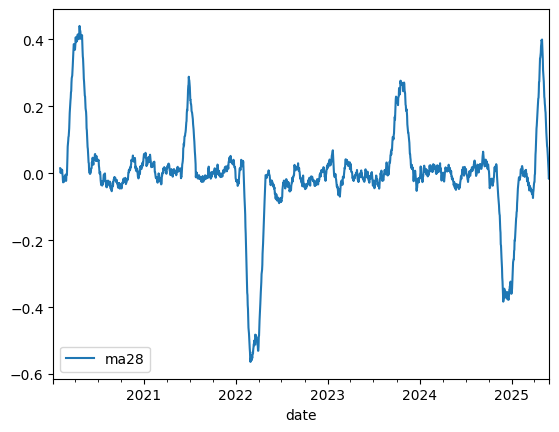

In [20]:
# Load a specific sheet, e.g. 'D_C'
df_D_N = pd.read_excel('/content/drive/MyDrive/CAPSTONE/DISPUTE.xlsx', sheet_name='Negotiations')

# Make sure 'date' is datetime (if it's a column)
df_D_N['date'] = pd.to_datetime(df_D_N['date'])

#Rolling Average
df_D_N['ma28'] = df_D_N['tone'].rolling(window=28).mean()

#Graph
df_D_N.plot(x="date", y="ma28")

Sanctions

<Axes: xlabel='date'>

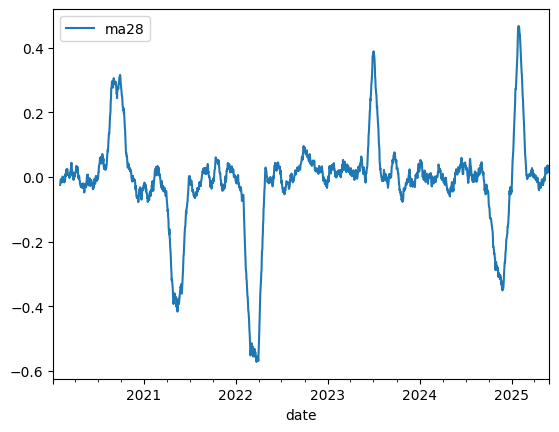

In [21]:
# Load a specific sheet, e.g. 'D_C'
df_D_S = pd.read_excel('/content/drive/MyDrive/CAPSTONE/DISPUTE.xlsx', sheet_name='Sanctions')

# Make sure 'date' is datetime (if it's a column)
df_D_S['date'] = pd.to_datetime(df_D_S['date'])

#Rolling Average
df_D_S['ma28'] = df_D_S['tone'].rolling(window=28).mean()

#Graph
df_D_S.plot(x="date", y="ma28")

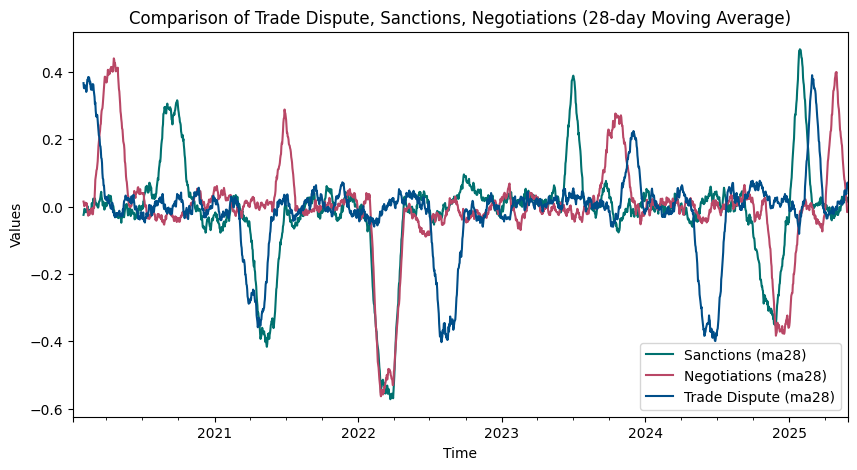

In [43]:
plt.figure(figsize=(10, 5))

df_D_S.plot(x="date", y="ma28", label="Sanctions (ma28)", color="#00716F", ax=plt.gca())
df_D_N.plot(x="date", y="ma28", label="Negotiations (ma28)", color="#B94766", ax=plt.gca())
df_D_TD.plot(x="date", y="ma28", label="Trade Dispute (ma28)", color="#004E89", ax=plt.gca())

plt.title("Comparison of Trade Dispute, Sanctions, Negotiations (28-day Moving Average)")
plt.xlabel("Time")
plt.ylabel("Values")
plt.legend()
plt.show()

Here we start to code the identification of the different terms from our data set. Our start date is *2017/01/02* with the end date being the current date. We create a data frame for each the volume or ratio of mentions done on this topic plue a data frame focused on the tone in which it was mentioned.

Now after creating both data-frames we mix both data sets with the dates as the index so we can merge it easier in the following step.

In [23]:
df_correlation_ETT = pd.merge(
    left=df_ETT_EBD,
    right=df_ETT_ED,
    how='left',
    left_on='date',
    right_on='date',
    suffixes=('_ETT_EBD', '_ETT_ED')  # Specify unique suffixes
)

df_correlation_ETT = pd.merge(
    left=df_correlation_ETT,
    right=df_ETT_ET,
    how='left',
    left_on='date',
    right_on='date',
    suffixes=('', '_ETT_ET')  # Specify unique suffixes
)

df_correlation_ETT.head()

,date,tone_ETT_EBD,ma28_ETT_EBD,tone_ETT_ED,ma28_ETT_ED,tone,ma28
0,2020-01-07,-0.168917,NaN,0.239258,NaN,NaN,NaN
1,2020-01-08,-0.180778,NaN,-0.138606,NaN,0.074507,NaN
2,2020-01-09,-0.108473,NaN,-0.056930,NaN,-0.020740,NaN
3,2020-01-10,0.180470,NaN,-0.178346,NaN,0.097153,NaN
4,2020-01-11,-0.026759,NaN,-0.192747,NaN,0.228454,NaN


In [24]:
df_correlation_ETT.drop(columns=['tone_ETT_EBD','tone_ETT_ED','tone'], axis=1, inplace=True)

In [25]:
df_correlation_ETT = df_correlation_ETT.rename(columns={'ma28_ETT_EBD': 'Budget Deficit','ma28_ETT_ED': 'Debt','ma28': 'Taxation'})

In [26]:
correlation_matrix_ETT = df_correlation_ETT.drop(columns=['date']).corr()
print(correlation_matrix_ETT)

                Budget Deficit      Debt  Taxation
Budget Deficit        1.000000 -0.418222 -0.282454
Debt                 -0.418222  1.000000  0.329397
Taxation             -0.282454  0.329397  1.000000


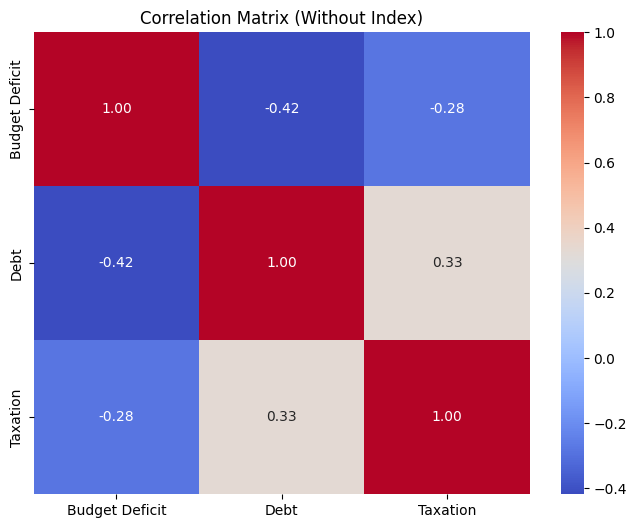

In [27]:
import seaborn as sns

plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix_ETT, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix (Without Index)")
plt.show()

In [28]:
df_correlation_ICT = pd.merge(
    left=df_ICT_DC,
    right=df_ICT_IGG,
    how='left',
    left_on='date',
    right_on='date',
    suffixes=('_ICT_DC', '_ICT_IGG')  # Specify unique suffixes
)

df_correlation_ICT = pd.merge(
    left=df_correlation_ICT,
    right=df_ICT_IJC,
    how='left',
    left_on='date',
    right_on='date',
    suffixes=('', '_ICT_IJC')  # Specify unique suffixes
)

df_correlation_ICT.head()

,date,tone_ICT_DC,ma28_ICT_DC,tone_ICT_IGG,ma28_ICT_IGG,tone,ma28
0,2020-01-07,0.016033,NaN,0.035911,NaN,-0.019930,NaN
1,2020-01-08,0.330872,NaN,0.105845,NaN,0.288011,NaN
2,2020-01-09,0.143484,NaN,-0.092761,NaN,0.039657,NaN
3,2020-01-10,0.010262,NaN,0.065250,NaN,0.186174,NaN
4,2020-01-11,0.160277,NaN,0.074637,NaN,-0.021647,NaN


In [29]:
df_correlation_ICT.drop(columns=['tone_ICT_DC','tone_ICT_IGG','tone'], axis=1, inplace=True)

In [30]:
df_correlation_ICT = df_correlation_ICT.rename(columns={'ma28_ICT_DC': 'Diplomatic Cooperation','ma28_ICT_IGG': 'Governance Gov','ma28': 'Judicial Cop'})

In [31]:
correlation_matrix_ICT = df_correlation_ICT.drop(columns=['date']).corr()
print(correlation_matrix_ICT)

                        Diplomatic Cooperation  Governance Gov  Judicial Cop
Diplomatic Cooperation                1.000000        0.307838      0.038607
Governance Gov                        0.307838        1.000000      0.207899
Judicial Cop                          0.038607        0.207899      1.000000


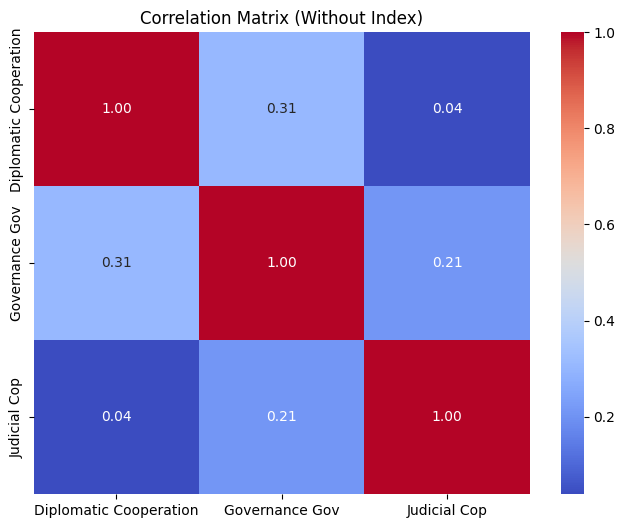

In [32]:
import seaborn as sns

plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix_ICT, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix (Without Index)")
plt.show()

In [33]:
df_correlation_D = pd.merge(
    left=df_D_S,
    right=df_D_N,
    how='left',
    left_on='date',
    right_on='date',
    suffixes=('_D_S', '_D_N')  # Specify unique suffixes
)

df_correlation_D = pd.merge(
    left=df_correlation_D,
    right=df_D_TD,
    how='left',
    left_on='date',
    right_on='date',
    suffixes=('', '_D_TD')  # Specify unique suffixes
)

df_correlation_D.head()


,date,tone_D_S,ma28_D_S,tone_D_N,ma28_D_N,tone,ma28
0,2020-01-07,-0.192753,NaN,-0.031805,NaN,0.835131,NaN
1,2020-01-08,0.065334,NaN,-0.042739,NaN,0.211908,NaN
2,2020-01-09,0.254414,NaN,-0.086085,NaN,0.362020,NaN
3,2020-01-10,-0.060415,NaN,-0.066047,NaN,0.347768,NaN
4,2020-01-11,-0.133881,NaN,-0.049517,NaN,0.389751,NaN


In [34]:
df_correlation_D.drop(columns=['tone_D_S','tone_D_N','tone'], axis=1, inplace=True)

In [35]:
df_correlation_D = df_correlation_D.rename(columns={'ma28_D_S': 'Sanctions','ma28_D_N': 'Negotiations','ma28': 'Trade Dispute'})

In [36]:
correlation_matrix_D = df_correlation_D.drop(columns=['date']).corr()
print(correlation_matrix_D)

               Sanctions  Negotiations  Trade Dispute
Sanctions       1.000000      0.390151       0.113758
Negotiations    0.390151      1.000000       0.033311
Trade Dispute   0.113758      0.033311       1.000000


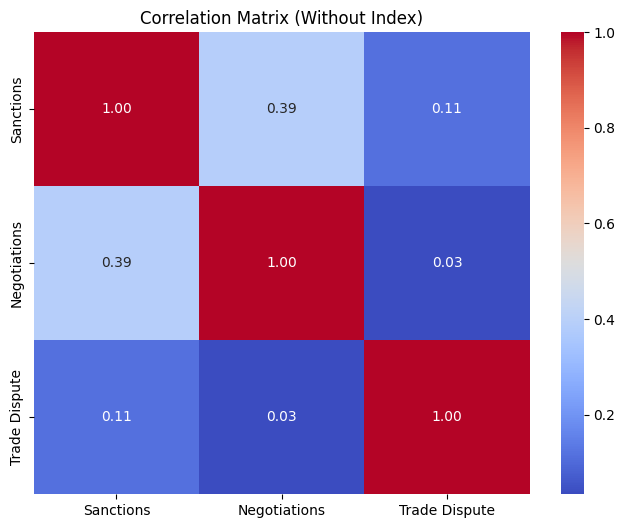

In [37]:
import seaborn as sns

plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix_D, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix (Without Index)")
plt.show()

In [38]:
df_correlation_F = pd.merge(
    left=df_correlation_ETT,
    right=df_correlation_ICT,
    how='left',
    left_on='date',
    right_on='date',
    suffixes=('', '')  # Specify unique suffixes
)

df_correlation_F = pd.merge(
    left=df_correlation_F,
    right=df_correlation_D,
    how='left',
    left_on='date',
    right_on='date',
    suffixes=('', '_')  # Specify unique suffixes
)

df_correlation_F.head()


,date,Budget Deficit,Debt,Taxation,Diplomatic Cooperation,Governance Gov,Judicial Cop,Sanctions,Negotiations,Trade Dispute
0,2020-01-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-01-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-01-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-01-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-01-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [39]:
correlation_matrix_F = df_correlation_F.drop(columns=['date']).corr()
print(correlation_matrix_F)

                        Budget Deficit      Debt  Taxation  \
Budget Deficit                1.000000 -0.418222 -0.282454   
Debt                         -0.418222  1.000000  0.329397   
Taxation                     -0.282454  0.329397  1.000000   
Diplomatic Cooperation       -0.182904  0.371278  0.662160   
Governance Gov                0.093497  0.041482  0.210535   
Judicial Cop                  0.032155 -0.044855  0.050359   
Sanctions                    -0.062128  0.072840  0.292439   
Negotiations                 -0.268008  0.323853  0.783005   
Trade Dispute                -0.121701  0.005382  0.095780   

                        Diplomatic Cooperation  Governance Gov  Judicial Cop  \
Budget Deficit                       -0.182904        0.093497      0.032155   
Debt                                  0.371278        0.041482     -0.044855   
Taxation                              0.662160        0.210535      0.050359   
Diplomatic Cooperation                1.000000        0.307

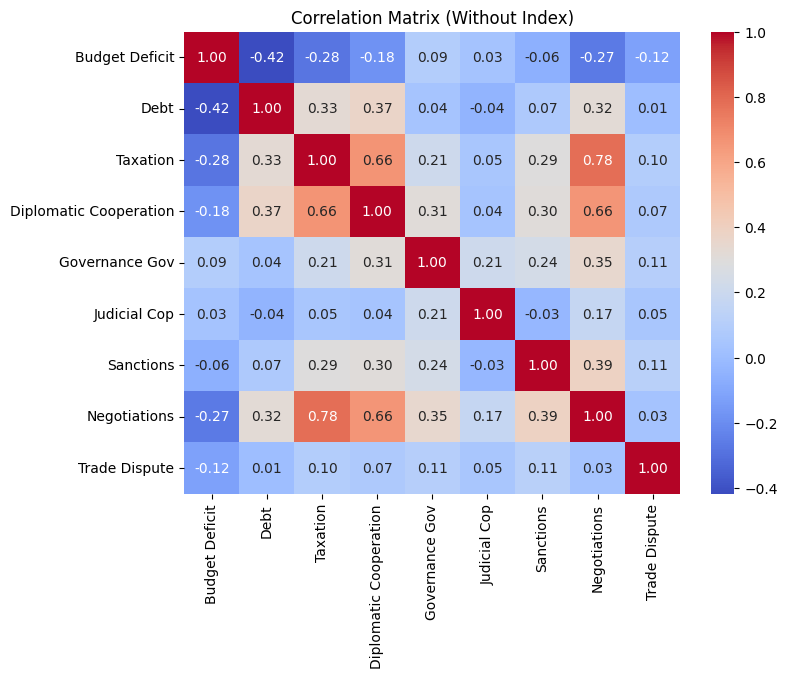

In [40]:
import seaborn as sns

plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix_F, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix (Without Index)")
plt.show()